# Normalizing energy consumption of buildings to be able to compare them to each other

- Created by Clayton Miller - clayton@nus.edu.sg - miller.clayton@gmail.com

Buildings come in all shapes, sizes and uses. It is difficult to compare the energy consumption of two buildings if they are not similar in these ways as it wouldn't be an *apples to apples* comparison. In order to compare buildings of different uses, sizes, and climates -- we have to do a process called `normalization`.



## The question -- how can we compare the energy consumption of buildings that are different sizes, from different climates, etc.?

To get started with this task, we can use the the BDG data set from several buildings. First we'll load the libraries and data once again.


In [3]:
import pandas as pd
from google.colab import drive
import os

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%matplotlib inline

In [4]:
os.chdir("/content/gdrive/My Drive//MIZZOU/OnlineCourse_edX_DataScienceForArchitectureConstruction/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")

In [5]:
buildingname = "Office_Abbey"

In [6]:
rawdata = pd.read_csv(buildingname+".csv", parse_dates=True, index_col='timestamp')

In [7]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Office_Abbey  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [8]:
rawdata.head()

,Office_Abbey
timestamp,
2015-01-01 00:00:00,27.79
2015-01-01 01:00:00,27.66
2015-01-01 02:00:00,27.13
2015-01-01 03:00:00,27.34
2015-01-01 04:00:00,27.34


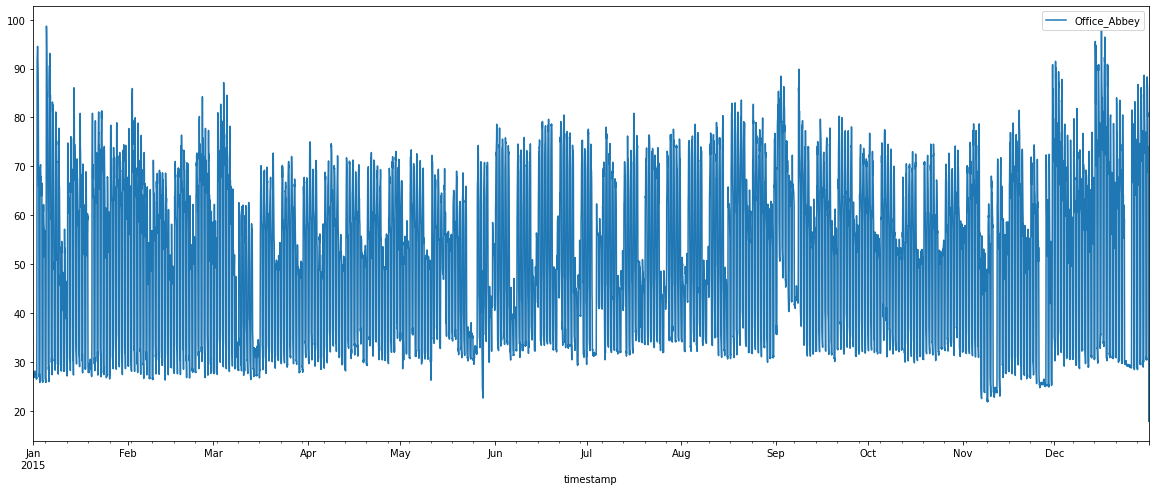

In [9]:
rawdata.plot(figsize=(20,8))

# Normalization based on floor area

One of the most simple ways of normalization is to simply divide energy consumption by the floor area to create the Energy Use Intensity (EUI). This metric takes energy and simply divides by the floor area (in ft2 or m2)

In [11]:
meta = pd.read_csv("/content/gdrive/MyDrive/MIZZOU/OnlineCourse_edX_DataScienceForArchitectureConstruction/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/all_buildings_meta_data.csv", index_col="uid")

In [12]:
meta.head()

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv


## Extract meta data from another file

You can see in the meta data file that there are various attributes that we can use to normalize the building consumption -- including `sqm` or size of the building

In [13]:
meta.loc[buildingname]

dataend                       31/12/15 23:00
datastart                     01/01/15 00:00
energystarscore                          NaN
heatingtype                              NaN
industry                           Education
mainheatingtype                          NaN
numberoffloors                           NaN
occupants                                NaN
primaryspaceusage                     Office
rating                                   NaN
sqft                                 74180.0
sqm                               6891.54454
subindustry               College/University
timezone                     America/Phoenix
yearbuilt                               1930
nickname                               Abbey
primaryspaceuse_abbrev                Office
newweatherfilename              weather0.csv
Name: Office_Abbey, dtype: object

In [14]:
meta.loc[buildingname]["sqm"]

6891.54454

Now we normalize using area by using a vector operation and resampling to monthly data.

In [15]:
rawdata.head()

,Office_Abbey
timestamp,
2015-01-01 00:00:00,27.79
2015-01-01 01:00:00,27.66
2015-01-01 02:00:00,27.13
2015-01-01 03:00:00,27.34
2015-01-01 04:00:00,27.34


In [16]:
#normalize
rawdata_normalized = rawdata/meta.loc[buildingname]["sqm"]

In [18]:
rawdata_normalized.head()

,Office_Abbey
timestamp,
2015-01-01 00:00:00,0.004032
2015-01-01 01:00:00,0.004014
2015-01-01 02:00:00,0.003937
2015-01-01 03:00:00,0.003967
2015-01-01 04:00:00,0.003967


In [19]:
rawdata_normalized_monthly = rawdata_normalized.resample("M").sum()

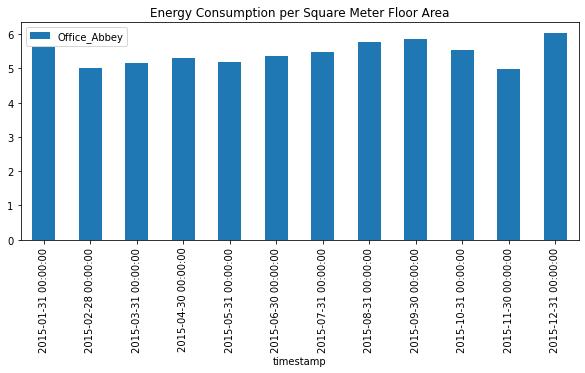

In [20]:
rawdata_normalized_monthly.plot(kind="bar", figsize=(10,4), title='Energy Consumption per Square Meter Floor Area')

# Automation of the process of analysis on multiple buildings

Normalization is really about the ability to compare a diverse set of buildings

Now we load 6 buildings to extract and normalize the data. Since the normalization process is most useful on a set of buildings, we will load six of the BDG buildings as an example to showcase the comparison.

In [21]:
buildingnamelist = ["Office_Abbey",
"Office_Pam",
"Office_Penny",
"UnivLab_Allison",
"UnivLab_Audra",
"UnivLab_Ciel"]

In [22]:
annual_data_list = []
annual_data_list_normalized = []

In [23]:
for buildingname in buildingnamelist:
    print("Getting data from: "+buildingname)
    
    rawdata = pd.read_csv(buildingname+".csv", parse_dates=True, index_col='timestamp')
    floor_area = meta.loc[buildingname]["sqm"]
    
    annual = rawdata.sum()

    normalized_data = rawdata/floor_area
    annual_normalized = normalized_data.sum()
    
    annual_data_list_normalized.append(annual_normalized)
    annual_data_list.append(annual) 

Getting data from: Office_Abbey
Getting data from: Office_Pam
Getting data from: Office_Penny
Getting data from: UnivLab_Allison
Getting data from: UnivLab_Audra
Getting data from: UnivLab_Ciel


In [27]:
totaldata = pd.concat(annual_data_list)
totaldata_normalized = pd.concat(annual_data_list_normalized)

In [25]:
totaldata

Office_Abbey       4.500047e+05
Office_Pam         9.239849e+05
Office_Penny       3.167204e+05
UnivLab_Allison    1.614309e+05
UnivLab_Audra      1.466867e+05
UnivLab_Ciel       3.122984e+06
dtype: float64

In [26]:
totaldata_normalized

Office_Abbey        65.298087
Office_Pam          95.022257
Office_Penny        90.947091
UnivLab_Allison    370.575397
UnivLab_Audra      344.517297
UnivLab_Ciel       143.740305
dtype: float64

## Unnormalized energy consumption

As you can see from the annual totals of energy consumption, the Lab named *Ciel* uses a lot of energy as compared to the other buildings!

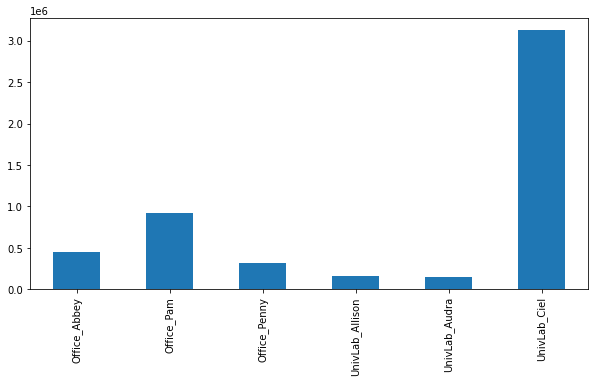

In [28]:
totaldata.plot(kind='bar',figsize=(10,5))

## Normalized Energy Consumption

However, when normalized using floor area, *Ciel* is not the highest consumer

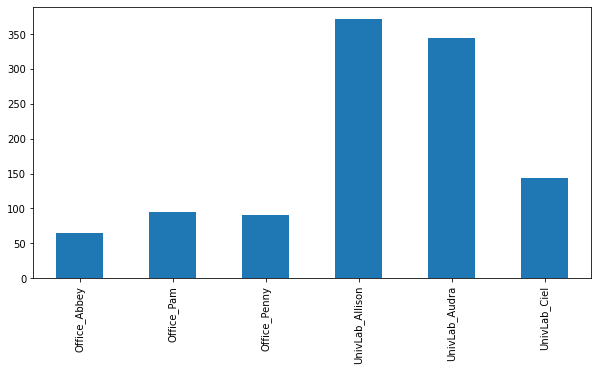

In [29]:
totaldata_normalized.plot(kind='bar',figsize=(10,5))